In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataFrameList = []
fileNameList = ['/content/drive/My Drive/metadados2017a.csv.gz','/content/drive/My Drive/metadados2017b.csv.gz','/content/drive/My Drive/metadados2018.csv.gz','/content/drive/My Drive/metadados2019.csv.gz','/content/drive/My Drive/metadados2020.csv.gz']
for fileName in fileNameList:
  df = pd.read_csv(fileName,compression = 'gzip',  encoding = "ISO-8859-1")
  dataFrameList.append(df)
dataFrame = pd.concat(dataFrameList);

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sel = dataFrame.groupby('NÃºmero do processo').head(1)
sel = sel[sel['Valor da Causa'] < 7000000]

In [ ]:
sel.to_csv('JFRNNaoSupervisionado.csv')


In [ ]:
!cp JFRNNaoSupervisionado.csv "drive/My Drive/"

In [ ]:
rec = sel[['CÃ³digo da classe processual','CÃ³digo do Assunto','Valor da Causa','Processo PrioritÃ¡rio']]
rec = rec.dropna()
rec.loc[rec['Processo PrioritÃ¡rio'] == 'N','Processo PrioritÃ¡rio'] = 0
rec.loc[rec['Processo PrioritÃ¡rio'] == 'S','Processo PrioritÃ¡rio'] = 1

In [ ]:
rec

,CÃ³digo da classe processual,CÃ³digo do Assunto,Valor da Causa,Processo PrioritÃ¡rio
0,156,10946,100000.00,0
1,12078,10685,167717.81,0
175,120,6046,677.00,0
4685,7,6177,114314.00,1
4686,120,10874,201000.00,0
...,...,...,...,...
340,120,10371,1039.00,0
904,157,10687,212.46,1
1006,120,11947,1039.00,0
1247,120,11946,1045.00,1


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=500)
model.fit(rec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=500, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.predict([[7,10730,1000,0],[7,10730,1300,0],[7,10730,15000,0]])

array([295, 295, 166], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 12

In [ ]:
all_predictions = model.predict(rec)

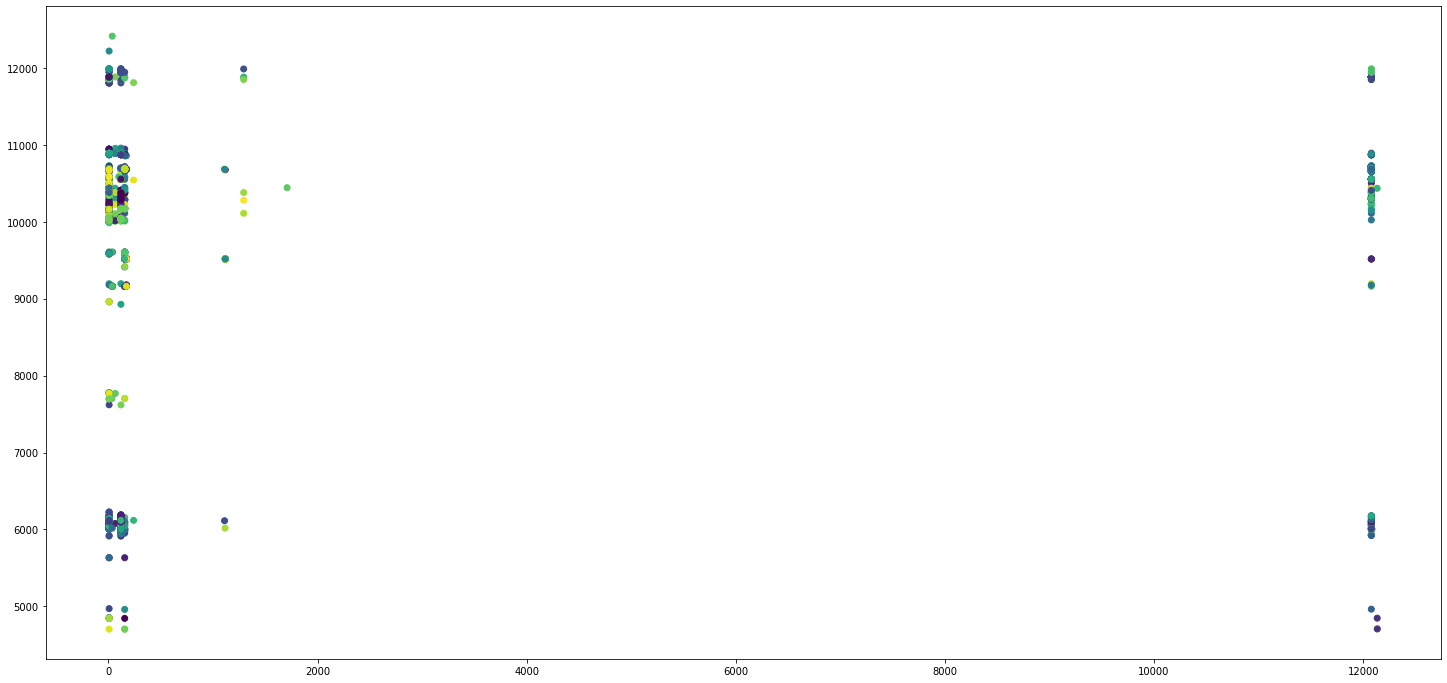

In [ ]:
x_axis = rec['CÃ³digo da classe processual']
y_axis = rec['CÃ³digo do Assunto']
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

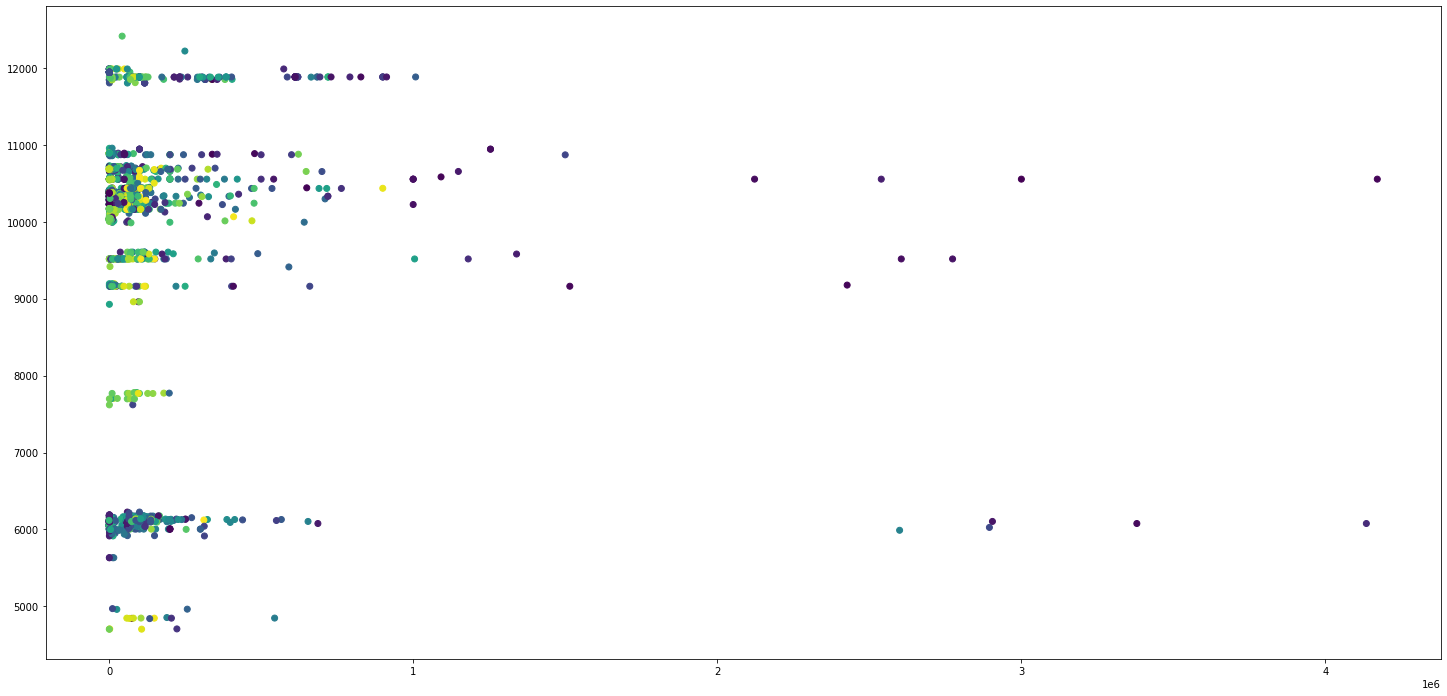

In [ ]:
x_axis = rec['Valor da Causa']
y_axis = rec['CÃ³digo do Assunto']
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

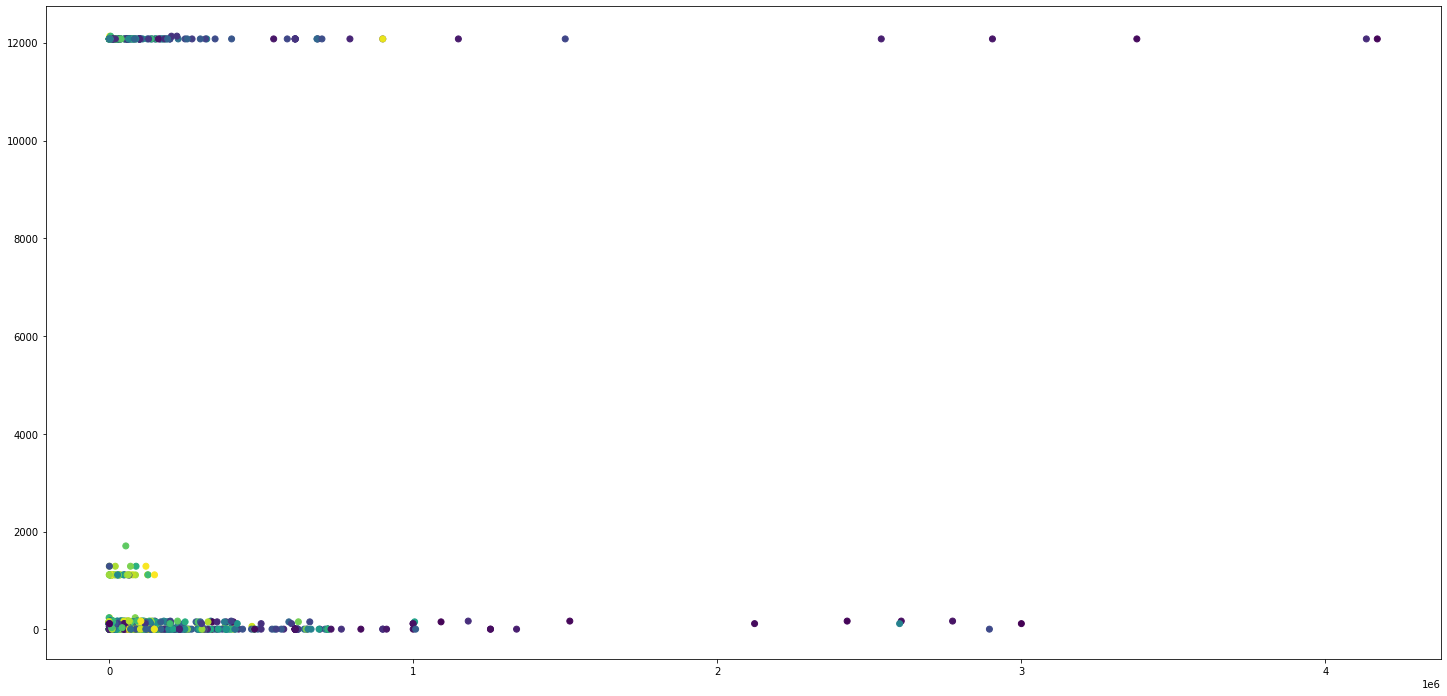

In [ ]:
x_axis = rec['Valor da Causa']
y_axis = rec['CÃ³digo da classe processual']
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

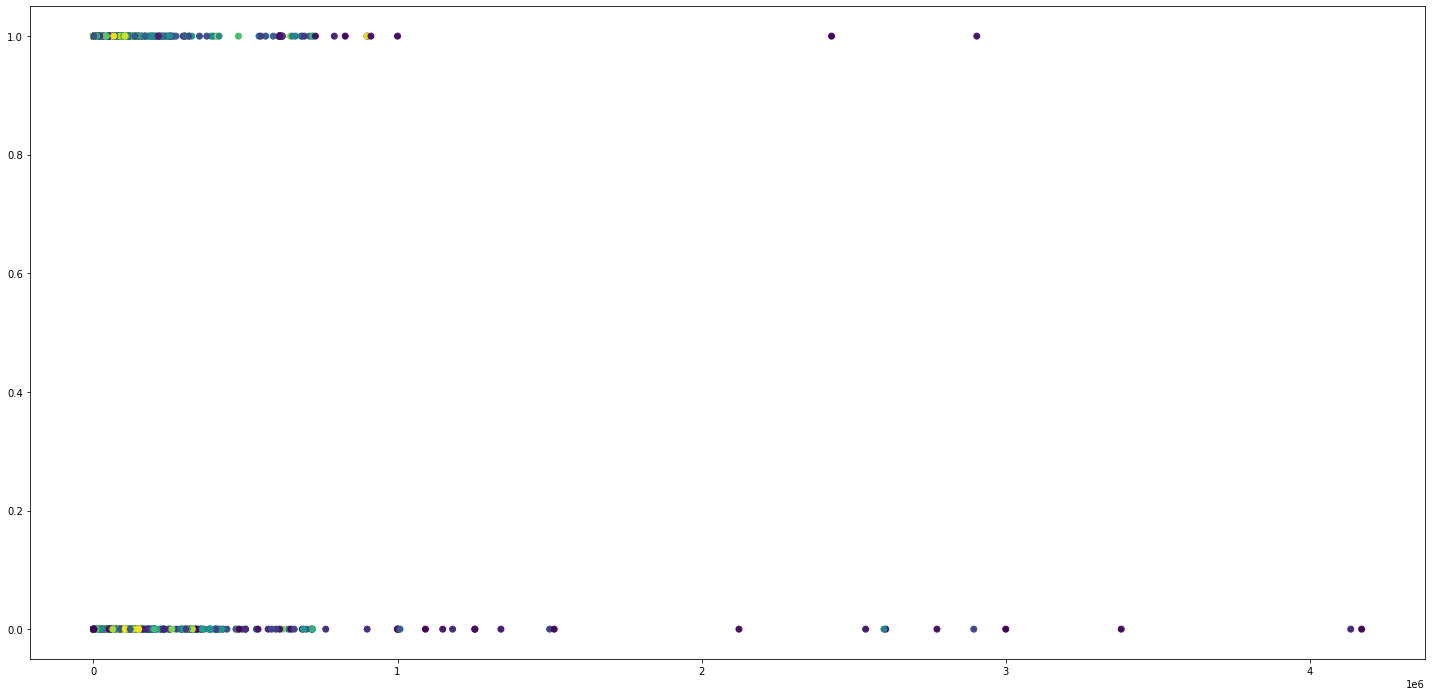

In [ ]:
x_axis = rec['Valor da Causa']
y_axis = rec['Processo PrioritÃ¡rio']
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

In [ ]:
pd.set_option('display.max_rows', 1000)

In [ ]:
tst = sel
tst.loc[tst['Processo PrioritÃ¡rio'] == 'N','Processo PrioritÃ¡rio'] = 0
tst.loc[tst['Processo PrioritÃ¡rio'] == 'S','Processo PrioritÃ¡rio'] = 1
tst['resultado'] = tst.apply(lambda x: model.predict([[x['CÃ³digo da classe processual'],x['CÃ³digo do Assunto'],x['Valor da Causa'],x['Processo PrioritÃ¡rio']]])[0], axis=1)
rectst = tst[['DescriÃ§Ã£o da classe processual','DescriÃ§Ã£o do Assunto','Valor da Causa','Processo PrioritÃ¡rio','resultado']]

In [ ]:
rectst.groupby('resultado').count()

,DescriÃ§Ã£o da classe processual,DescriÃ§Ã£o do Assunto,Valor da Causa,Processo PrioritÃ¡rio
resultado,,,,
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,118,118,118,118
4,2,2,2,2
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,4,4,4,4


In [ ]:
rectst[rectst['resultado'] == 3]

,DescriÃ§Ã£o da classe processual,DescriÃ§Ã£o do Assunto,Valor da Causa,Processo PrioritÃ¡rio,resultado
11932,MANDADO DE SEGURANÇA CÍVEL,Posse e Exercício,1000.0,0,3
29204,MANDADO DE SEGURANÇA CÍVEL,Prazo de Validade,1000.0,0,3
43991,MANDADO DE SEGURANÇA CÍVEL,Contrato Temporário de Mão de Obra L 8.745/1993,937.0,0,3
44610,MANDADO DE SEGURANÇA CÍVEL,Contrato Temporário de Mão de Obra L 8.745/1993,937.0,0,3
49898,MANDADO DE SEGURANÇA CÍVEL,Escolaridade,937.0,0,3
51447,MANDADO DE SEGURANÇA CÍVEL,Exercício em Outro Município,1000.0,0,3
54527,MANDADO DE SEGURANÇA CÍVEL,Contrato Temporário de Mão de Obra L 8.745/1993,937.0,0,3
54837,MANDADO DE SEGURANÇA CÍVEL,Escolaridade,1000.0,0,3
77618,MANDADO DE SEGURANÇA CÍVEL,Acumulação de Cargos,1000.0,0,3
82245,PROCEDIMENTO COMUM CÍVEL,Classificação e/ou Preterição,1000.0,0,3


In [ ]:
rectst[rectst['DescriÃ§Ã£o do Assunto'] == 'Fornecimento de Medicamentos']['resultado'].unique()

array([48, 11, 98, 23, 74, 60, 70, 57, 30, 36, 76, 47, 87, 95, 18, 72, 58,
        3])

In [ ]:
rectst.groupby('DescriÃ§Ã£o do Assunto')['resultado'].nunique()

DescriÃ§Ã£o do Assunto
 Prazo                                                                                                1
1/3 de férias                                                                                         2
ASSISTÊNCIA SOCIAL                                                                                    2
Abatimento proporcional do preço                                                                      4
Abono da Lei 8.178/91                                                                                 7
Abono de Permanência                                                                                  8
Abono de Permanência em Serviço (Art. 87)                                                             4
Abuso de Poder                                                                                        7
Acidente de Trânsito                                                                                 12
Acordo de Exclusividade                  

In [ ]:
rectst.groupby('DescriÃ§Ã£o do Assunto')['resultado'].count()

DescriÃ§Ã£o do Assunto
 Prazo                                                                                                 1
1/3 de férias                                                                                         15
ASSISTÊNCIA SOCIAL                                                                                     2
Abatimento proporcional do preço                                                                       4
Abono da Lei 8.178/91                                                                                  9
Abono de Permanência                                                                                  13
Abono de Permanência em Serviço (Art. 87)                                                              4
Abuso de Poder                                                                                        43
Acidente de Trânsito                                                                                  17
Acordo de Exclusividade         